In [2]:
import math

from scipy.io import arff
from operator import index

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
from scipy.stats import expon, skew, norm
from scipy import integrate
import seaborn as sns
import math
plt.rcParams['figure.figsize'] = [15, 7]
import warnings

warnings.filterwarnings('ignore')

# 1

In [3]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df = pd.DataFrame(arff_file[0])

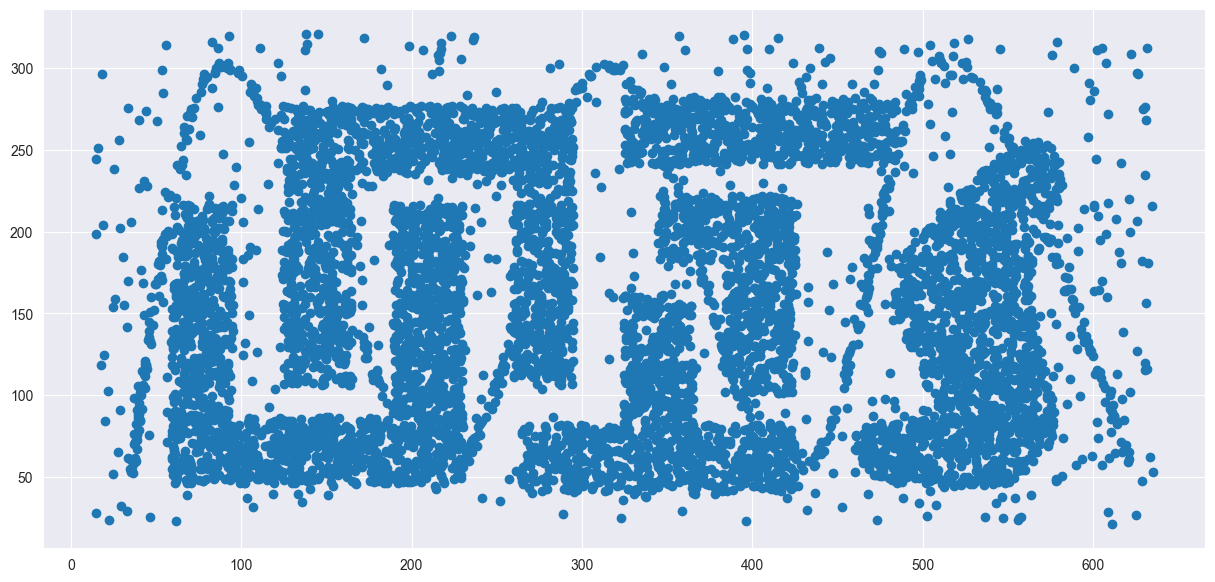

In [4]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

In [5]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [6]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'max2':
            arr += [x[-1]+x[-2]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")

4.64566683234964


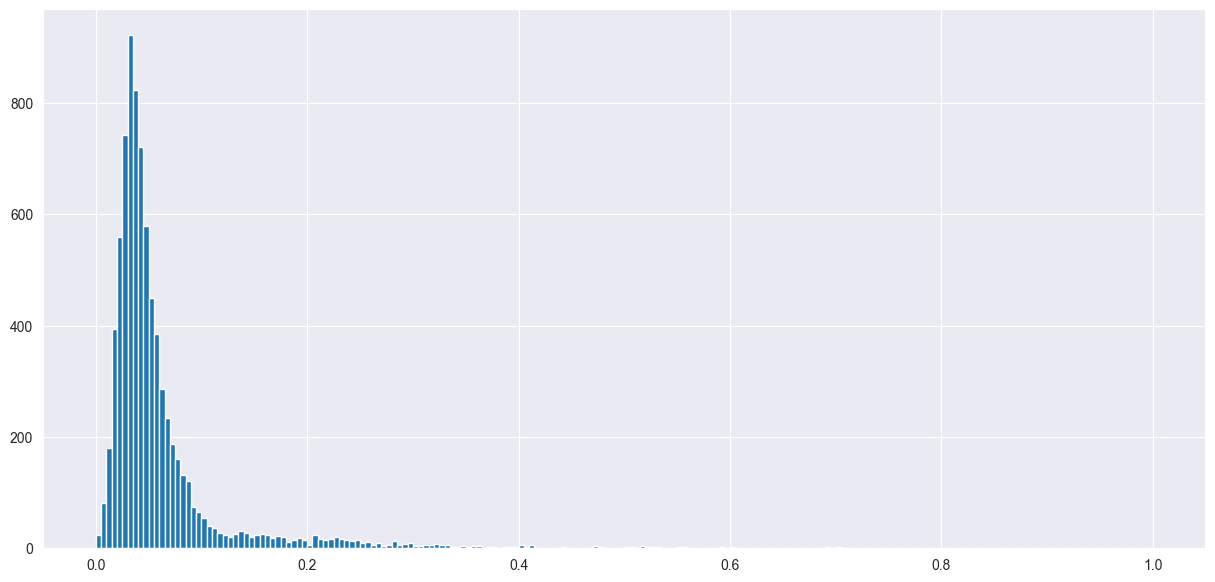

In [7]:
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
print(skew(arr))
plt.hist(arr,bins=200)
plt.show()

In [8]:
means = np.mean(arr)
inMean = 1/means

In [9]:
posNeg1 = []
spaceStep1 = np.linspace(.7,.99,20)
for e in spaceStep1:
    ker = -means*np.log(1-e)
    print(-means*np.log(1-.88))
    f = integrate.quad(lambda x: inMean*np.exp(-x*inMean), 0, ker)
    newArr = arr > ker
    print(f)
    posNeg1.append([((y[newArr] == 6).sum() / (((y == 6).sum()))), ((y[newArr] != 6).sum() / ((y != 6).sum()))])

print(posNeg1)

0.1311881176869189
(0.7000000000000001, 7.771561172376096e-15)
0.1311881176869189
(0.7152631578947368, 7.941016265608357e-15)
0.1311881176869189
(0.7305263157894737, 8.110471358840617e-15)
0.1311881176869189
(0.7457894736842106, 8.279926452072878e-15)
0.1311881176869189
(0.7610526315789472, 8.449381545305137e-15)
0.1311881176869189
(0.7763157894736841, 8.618836638537398e-15)
0.1311881176869189
(0.7915789473684209, 8.788291731769659e-15)
0.1311881176869189
(0.806842105263158, 8.957746825001923e-15)
0.1311881176869189
(0.8221052631578946, 9.127201918234179e-15)
0.1311881176869189
(0.8373684210526317, 9.296657011466443e-15)
0.1311881176869189
(0.8526315789473685, 9.466112104698704e-15)
0.1311881176869189
(0.8678947368421053, 9.635567197930963e-15)
0.1311881176869189
(0.8831578947368423, 9.805022291163226e-15)
0.1311881176869189
(0.8984210526315789, 9.974477384395485e-15)
0.1311881176869189
(0.9136842105263159, 1.0143932477627747e-14)
0.1311881176869189
(0.9289473684210525, 1.0313387570860

[False False False ... False False False]


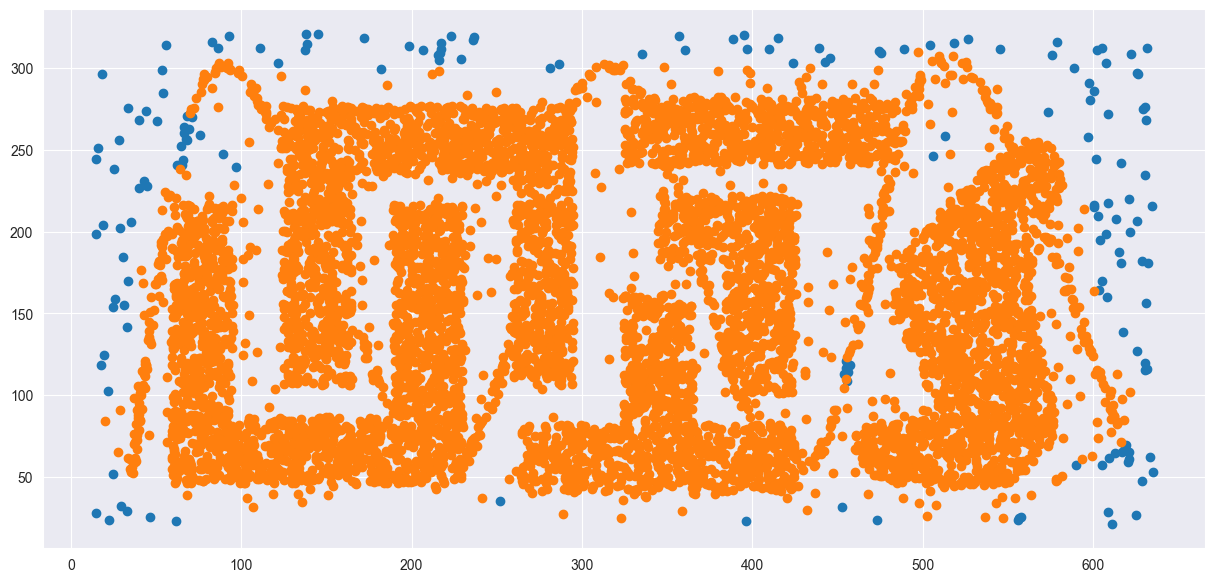

In [10]:

print(newArr)
plt.scatter(X[newArr,0],X[newArr,1])
plt.scatter(X[~newArr,0],X[~newArr,1])
plt.show()

(170, 2) (7830, 2)
594 7236


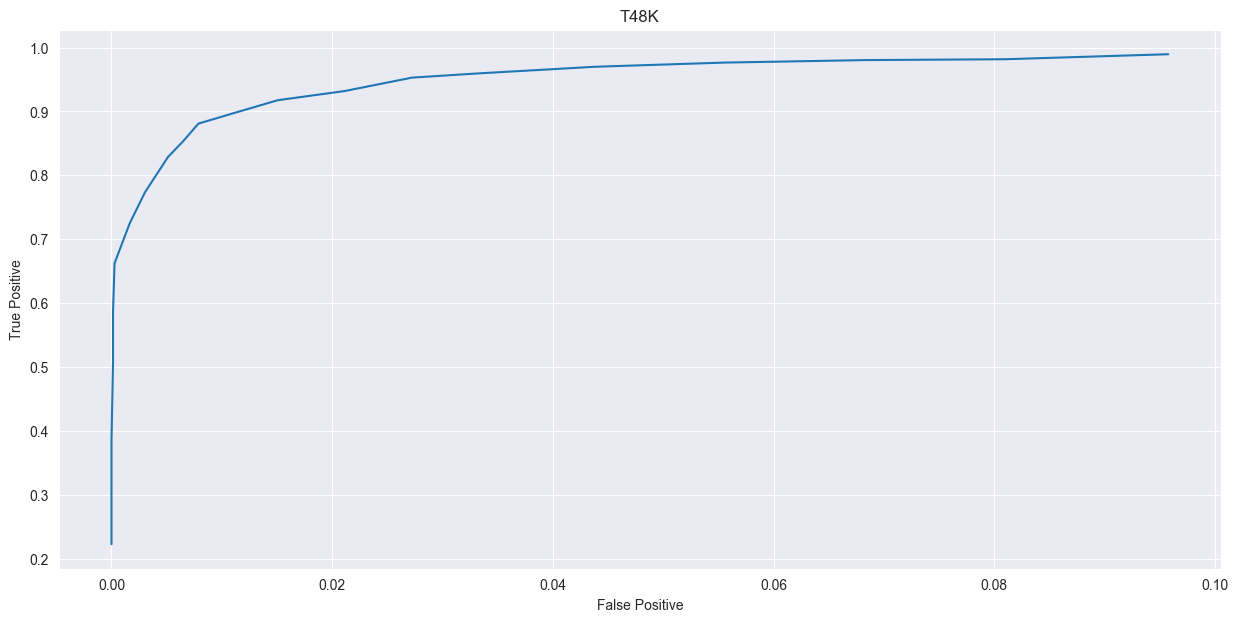

-0.09084440725401496


In [11]:
print(X[newArr].shape,X[~newArr].shape)
print((y[~newArr] == 6).sum(),(y[~newArr] != 6).sum())
posNeg1 = np.array(posNeg1)
plt.plot(posNeg1[:,1],posNeg1[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("T48K")
plt.show()
print(integrate.trapezoid(posNeg1[:,0],posNeg1[:,1]))

In [12]:
total2 = integrate.trapezoid(posNeg1[:,0], x=posNeg1[:,1] / (posNeg1[0][0]*posNeg1[0][1])) * -100
print(total2)
# 525254.5 / 550420 = 95.43

95.85948296265758


# 1

# 2

In [13]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t7-10k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df3 = pd.DataFrame(arff_file[0])
df3.tail()

,x,y,CLASS
9995,451.783997,372.544006,b'6'
9996,550.674988,327.447998,b'1'
9997,474.742004,161.518005,b'3'
9998,535.835022,375.765991,b'1'
9999,234.878006,181.878006,b'8'


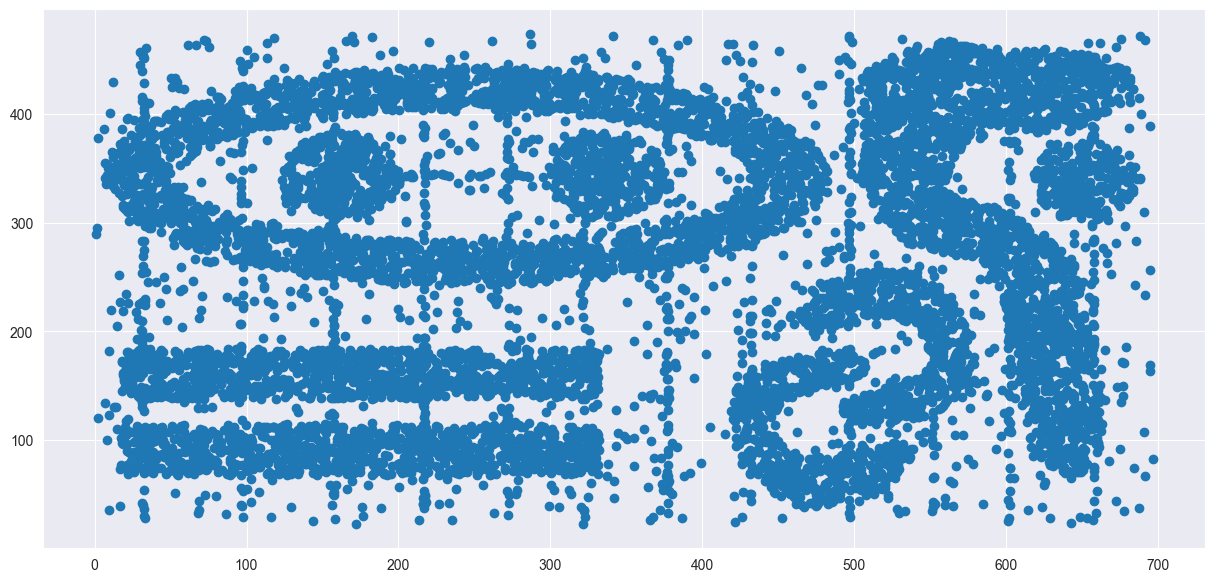

In [14]:
plt.scatter(df3['x'],df3['y'])
plt.show()

In [15]:
X = df3.iloc[:,:2].values
y = df3.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [16]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

0.25083038066882507
(0.7, 7.771561172376096e-15)
0.25083038066882507
(0.7152631578947368, 7.941016265608357e-15)
0.25083038066882507
(0.7305263157894738, 8.110471358840619e-15)
0.25083038066882507
(0.7457894736842104, 8.279926452072877e-15)
0.25083038066882507
(0.7610526315789472, 8.449381545305137e-15)
0.25083038066882507
(0.7763157894736841, 8.618836638537398e-15)
0.25083038066882507
(0.7915789473684212, 8.78829173176966e-15)
0.25083038066882507
(0.8068421052631578, 8.95774682500192e-15)
0.25083038066882507
(0.8221052631578947, 9.12720191823418e-15)
0.25083038066882507
(0.8373684210526315, 9.296657011466442e-15)
0.25083038066882507
(0.8526315789473684, 9.466112104698702e-15)
0.25083038066882507
(0.8678947368421054, 9.635567197930965e-15)
0.25083038066882507
(0.8831578947368421, 9.805022291163226e-15)
0.25083038066882507
(0.8984210526315789, 9.974477384395485e-15)
0.25083038066882507
(0.9136842105263159, 1.0143932477627747e-14)
0.25083038066882507
(0.9289473684210525, 1.03133875708600

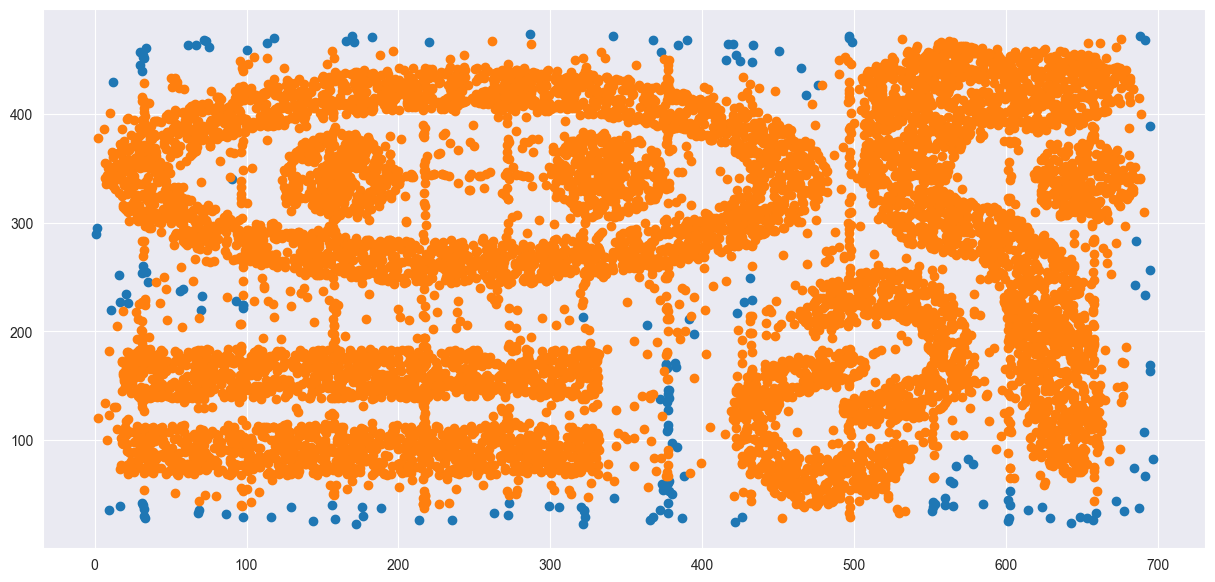

In [17]:
means = np.mean(arr)
inMean = 1 / means
posNeg = []
spaceStep = np.linspace(.7,.99,20)
for e in spaceStep:
    ker = -means * np.log(1 - e)
    print(-means * np.log(1 - .88))
    f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
    print(f)
    newArr = arr > ker
    posNeg.append([((y[newArr] == 9).sum() / (((y == 9).sum()))), ((y[newArr] != 9).sum() / ((y != 9).sum()))])
    y.max()

print(newArr)
print(posNeg)
plt.scatter(X[newArr, 0], X[newArr, 1])
plt.scatter(X[~newArr, 0], X[~newArr, 1])
plt.show()

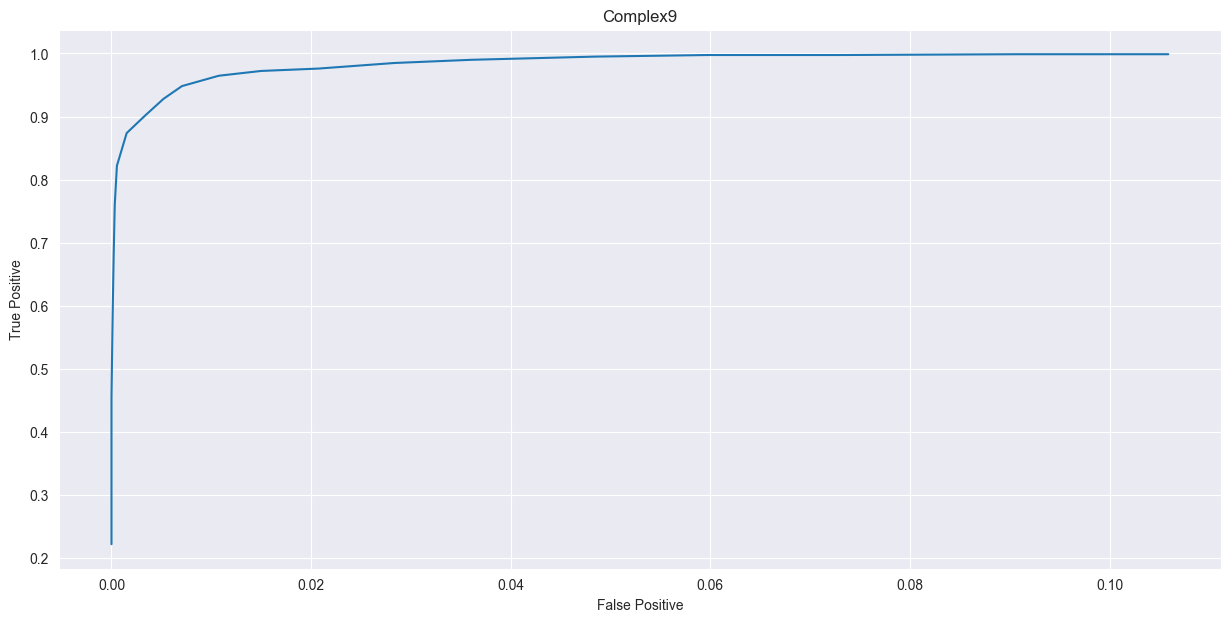

-0.10417736224100256


In [18]:
posNeg = np.array(posNeg)
plt.plot(posNeg[:,1], posNeg[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Complex9")
plt.show()
print(integrate.trapezoid(posNeg[:,0], x=posNeg[:,1]))

In [19]:
total2 = integrate.trapezoid(posNeg[:,0], x=posNeg[:,1] / (posNeg[0][0]*posNeg[0][1])) * -100
print(total2)
#824456
#~= 98.3%

98.51055139550714


# 2

# 3

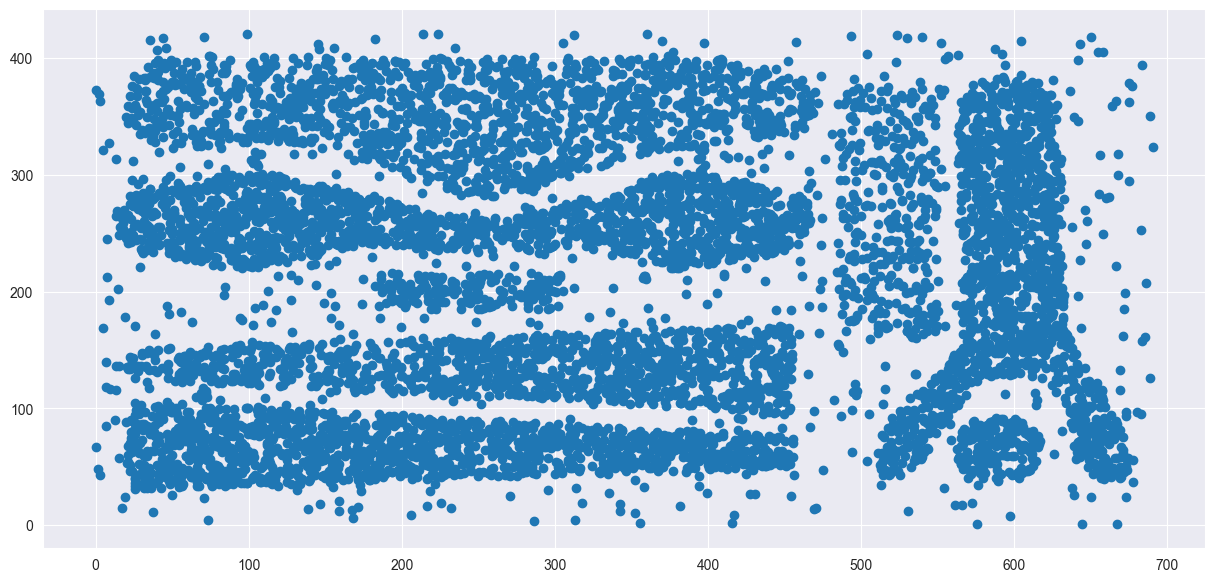

[1] 2 1
4.531173284033003


In [20]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t8-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df3 = pd.DataFrame(arff_file[0])
df3.tail()
plt.scatter(df3['x'], df3['y'])
plt.show()
X = df3.iloc[:, :2].values
y = df3.iloc[:, 2].values
le = LabelEncoder()
y = le.fit_transform(y)


def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist


knn, distReturn = main(X, y, 10)


def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
means = np.mean(arr)
inMean = 1 / means
posNeg2 = []
tots = []
spaceStep2 = np.linspace(.989,.99,20)
for e in spaceStep2:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg2.append([((y[newArr] == 1).sum() / (y == 1).sum()), ((y[newArr] != 1).sum() / (y != 1).sum())])

posNeg2 = np.array(posNeg2)
arrtest1, arrtest2 = np.split(posNeg2, 2,axis=1)
arrtest1 = arrtest1.flatten()
arrtest2 = arrtest2.flatten()
arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest1))
arrtest2 = np.nan_to_num(arrtest2)
if np.sum(arrtest2) == 0:
    tots += [1]
else:
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(tots, tots.index(max(tots))+2,max(tots))
print(skew(arr))

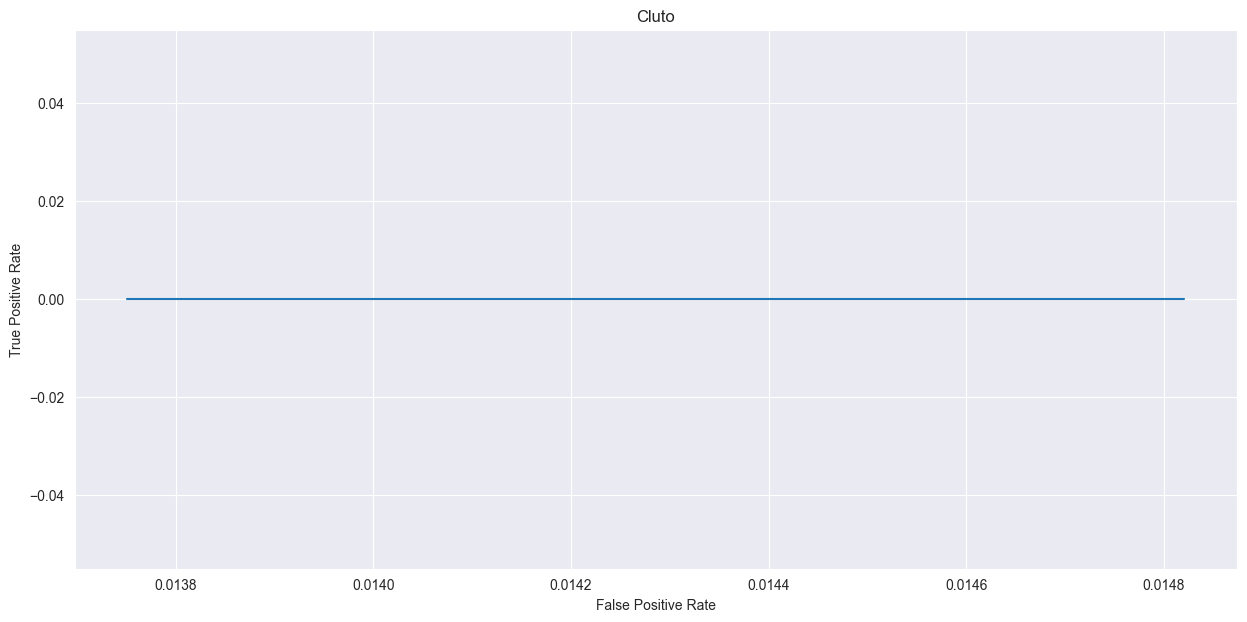

0.0


In [21]:
posNeg2 = np.array(posNeg2)
plt.plot(posNeg2[:,1], posNeg2[:,0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Cluto")
plt.show()
print(integrate.trapezoid(posNeg2[:,0], x=posNeg2[:,1]))

In [22]:
total2 = integrate.trapezoid(posNeg2[:,0], x=posNeg2[:,1] / (posNeg2[0][0]*posNeg2[0][1])) * -100
print(total2)
"""
print(X[newArr].shape, X[~newArr].shape)
print((y[~newArr] == 8).sum(), (y[~newArr] != 8).sum())
print((y==8).sum())
"""

nan


'\nprint(X[newArr].shape, X[~newArr].shape)\nprint((y[~newArr] == 8).sum(), (y[~newArr] != 8).sum())\nprint((y==8).sum())\n'

# Hepa

In [60]:
arff_file = arff.loadarff('./real/Hepatitis_withoutdupl_norm_16.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,...,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology,outlier,id
0,0.269231,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.133333,0.271654,0.034483,0.655172,0.75,0.0,b'no',1.0
1,0.365385,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.222222,0.204724,0.039409,0.793103,0.85,0.0,b'no',2.0
2,0.230769,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.155556,0.129921,0.578818,0.551724,0.54,0.0,b'no',3.0
3,0.403846,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.133333,0.216535,0.113300,0.620690,0.52,0.0,b'no',4.0
4,0.192308,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.422222,0.122047,0.320197,0.965517,0.78,0.0,b'no',5.0


[1.         1.         0.85714286 0.71428571 0.71428571 0.71428571
 0.57142857 0.28571429 0.28571429 0.28571429 0.28571429 0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[1.         0.66666667 0.33333333 0.33333333 0.16666667 0.16666667
 0.16666667 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[1.  0.6 0.6 0.6 0.6 0.6 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
[1.         0.83333333 0.33333333 0.33333333 0.33333333 0.16666667
 0.16666667 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
[1.  1.  1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
[1.  1.  1.  1.  1.  1.  1.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0. ]
[1.         1.         1.         1.         1.         1.
 0.33333333 0.         0.         0.         0.         0.
 0.      

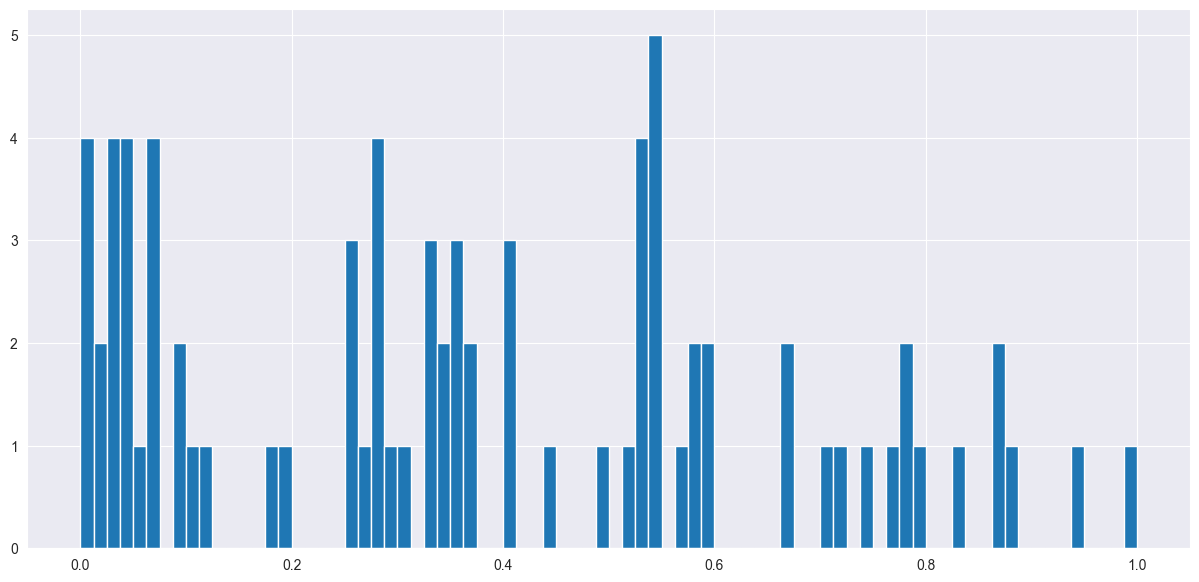

In [64]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)


def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,31):
    knn, distReturn = main(X, y, v)

    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="max")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    normsGuess = norm.fit(arr)
    spaceStep4 = np.linspace(.9,.99,20)
    for e in spaceStep4:
        newArr = arr > norm.ppf(e,loc=normsGuess[0],scale=normsGuess[1])
        posNeg4.append([((y[newArr] == 1).sum() / (((y == 1).sum()))), ((y[newArr] != 1).sum() / ((y != 1).sum()))])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest2))
    arrtest2 = np.nan_to_num(arrtest2)
    print(arrtest2)
    if np.sum(arrtest2) == 0:
        tots += [1]
    else:
        tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(tots, tots.index(max(tots))+2,max(tots))
print(skew(arr))
plt.hist(arr,bins=80)
plt.show()

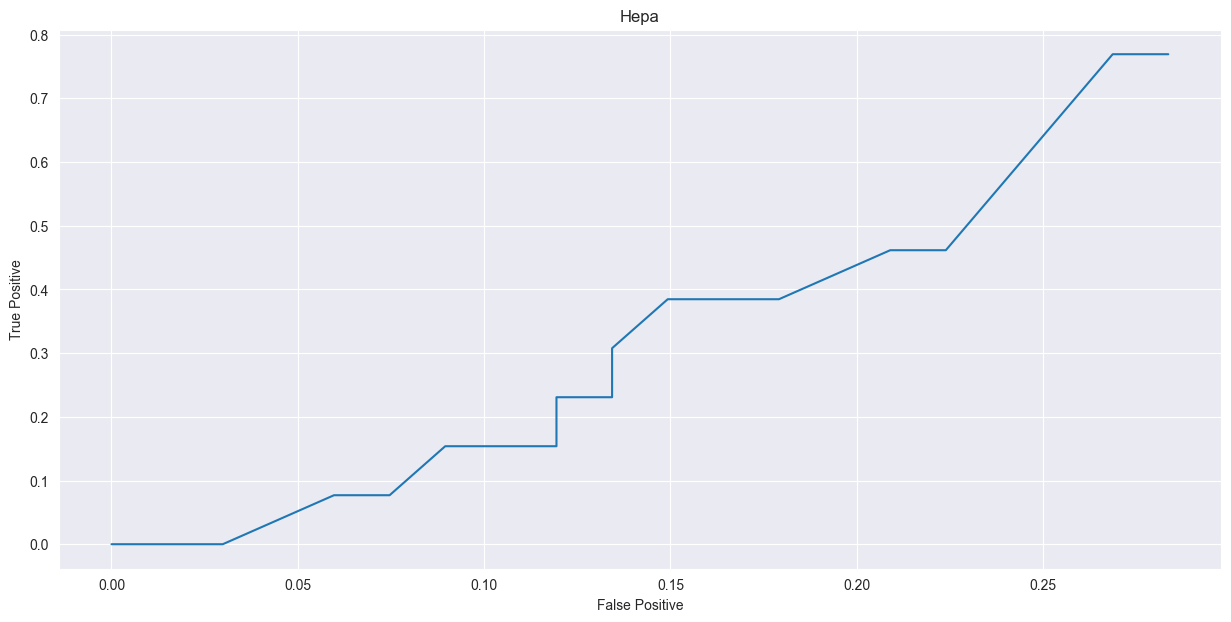

-0.08725602755453502


In [25]:
posNeg4 = np.array(posNeg4)
plt.plot(posNeg4[:,1], posNeg4[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Hepa")
plt.show()
print(integrate.trapezoid(posNeg4[:,0], x=posNeg4[:,1]))

In [26]:
total4 = integrate.trapezoid(posNeg4[:,0], x=posNeg4[:,1] / (posNeg4[0][0]*posNeg4[0][1])) * -100
print(total4)

39.99999999999999


In [45]:
arff_file = arff.loadarff('./real/Arrhythmia_withoutdupl_norm_46.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att271,att272,att273,att274,att276,att277,att278,att279,outlier,id
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579,b'yes',1.0
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971,b'yes',2.0
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990,b'yes',3.0
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544,b'no',4.0
4,0.156627,0.0,0.094815,0.264706,0.338346,0.318702,0.321300,0.241758,0.443902,0.818182,...,0.853659,0.516949,0.902098,0.0,0.53125,0.683333,0.433835,0.451133,b'yes',6.0


In [46]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,71):
    knn, distReturn = main(X, y, v)

    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.9,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), ((y[newArr] != 1).sum() / (y != 1).sum())])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest2))
    arrtest2 = np.nan_to_num(arrtest2)
    if np.sum(arrtest2) == 0:
        tots += [1]
    else:
        tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(tots, tots.index(max(tots))+2,max(tots))
print(skew(arr))

[1, 1, 0.9705882352941175, 0.9705882352941175, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] 2 1
1.6744670481768396


In [29]:
arff_file = arff.loadarff('./real/HeartDisease_withoutdupl_norm_44.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,id,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,outlier
0,1.0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.0,b'yes'
1,2.0,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.0,b'no'
2,3.0,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.0,b'yes'
3,4.0,0.729167,1.0,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.0,b'no'
4,5.0,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.0,b'no'


nan 0


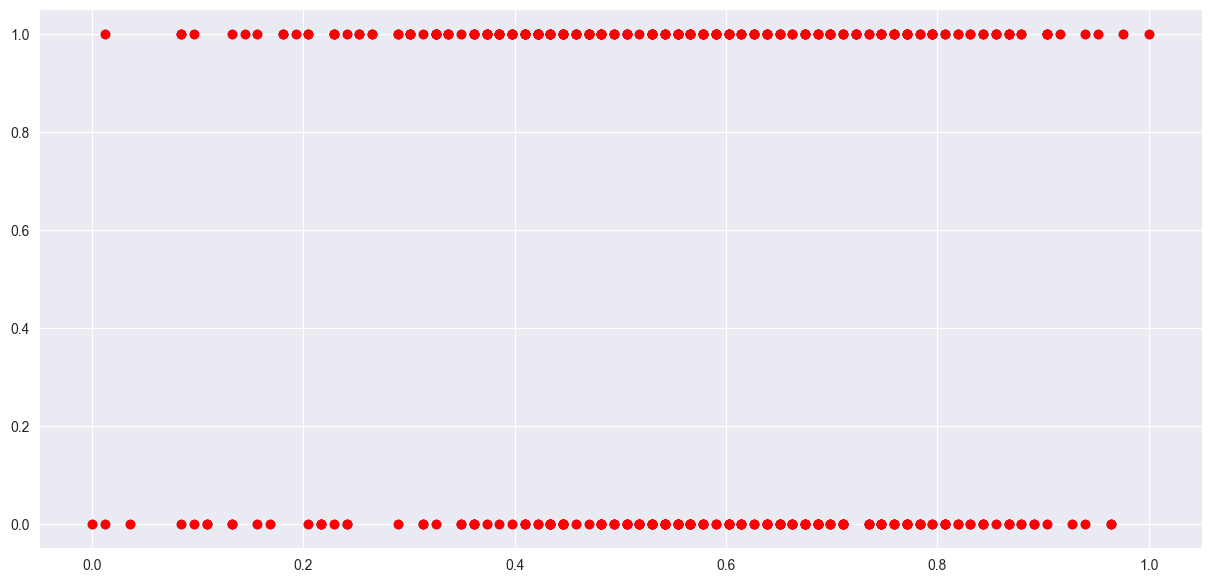

In [47]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.9,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([(y[newArr] == 1).sum(), (y[newArr] != 1).sum()])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest1))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots)))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1],color='red')
plt.show()

In [31]:
arff_file = arff.loadarff('./real/SpamBase_withoutdupl_norm_40.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att50,att51,att52,att53,att54,att55,att56,att57,id,outlier
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1.0,b'yes'
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,2.0,b'yes'
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,3.0,b'yes'
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,4.0,b'yes'
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,5.0,b'yes'


In [32]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.9,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([(y[newArr] == 1).sum(), (y[newArr] != 1).sum()])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest1))
    arrtest2 = np.nan_to_num(arrtest2)
    if np.sum(arrtest2) == 0:
        tots += [1]
    else:
        tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots))+2,tots)
print(skew(arr))

0.5387008101851852 17 [0.41052797265695273, 0.4073788206236493, 0.44212121212121214, 0.4559482848503806, 0.45596645062905067, 0.4340449866565002, 0.42783648498331484, 0.45689655172413796, 0.43639524775427413, 0.4848053181386515, 0.4699074074074074, 0.4989898989898991, 0.5189776553412916, 0.5233758348512446, 0.5292712066905616, 0.5387008101851852, 0.5347744360902256, 0.5320220193340494, 0.5377346193952034, 0.5265901981230449, 0.4934035181236674, 0.4919905462184874, 0.486344537815126, 0.48531314699792966, 0.46901128069011283, 0.46577606390304377, 0.47018539014941896, 0.48101793909052976, 0.4633053221288515, 0.4494992241500917, 0.46514084507042247, 0.4484258492129246, 0.4653183023872678, 0.476806133056133, 0.4754239533651299, 0.4675203414699212, 0.4623182606375883, 0.4610510871015072, 0.46197668256491786, 0.46038685744568086, 0.461508093170154, 0.4682666666666667, 0.4611111111111111, 0.45108974358974363, 0.44897435897435894, 0.45400710619818396, 0.4517699697328595, 0.451177786550862, 0.45

In [48]:
arff_file = arff.loadarff('./real/Parkinson_withoutdupl_norm_75.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,id,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,outlier
0,1.0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,...,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310,b'yes'
1,2.0,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,...,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326,b'yes'
2,3.0,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,...,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682,b'yes'
3,4.0,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,...,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949,b'yes'
4,5.0,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,...,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611,b'yes'


In [49]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.9,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum() / (y != 1).sum()])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest2))
    arrtest2 = np.nan_to_num(arrtest2)
    if np.sum(arrtest2) == 0:
        tots += [1]
    else:
        tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots))+2,tots)
print(skew(arr))

1 2 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
3.5801543681637953


In [50]:
arff_file = arff.loadarff('./real/Glass_withoutdupl_norm.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,var_0000,var_0001,var_0002,var_0003,var_0004,var_0005,var_0006,id,outlier
0,0.467651,0.321584,0.768880,0.246630,0.838799,0.099737,0.298340,1.0,b'no'
1,0.496412,0.220491,0.776032,0.316598,0.919973,0.089145,0.279479,2.0,b'no'
2,0.519133,0.404464,0.768012,0.334978,0.801622,0.092369,0.271238,3.0,b'no'
3,0.199650,0.547373,0.374284,0.362223,0.817017,0.000000,0.177913,4.0,b'yes'
4,0.847261,0.286361,0.000000,0.217792,0.000000,0.019135,1.000000,5.0,b'no'


In [51]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,80):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.9,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum()/ ((y != 1).sum())])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest2))
    arrtest2 = np.nan_to_num(arrtest2)
    if np.sum(arrtest2) == 0:
        tots += [1]
    else:
        tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots)),tots)

0.8881578947368421 61 [0.31666666666666665, 0.36718749999999994, 0.4407894736842105, 0.65, 0.638888888888889, 0.6323529411764706, 0.638888888888889, 0.631578947368421, 0.5833333333333334, 0.5277777777777779, 0.47058823529411775, 0.47058823529411775, 0.5, 0.5138888888888888, 0.5263157894736843, 0.5, 0.47058823529411775, 0.5263157894736843, 0.5, 0.5, 0.5125, 0.4736842105263158, 0.4625, 0.43421052631578955, 0.4523809523809524, 0.4210526315789474, 0.3611111111111111, 0.3289473684210526, 0.33333333333333326, 0.26315789473684215, 0.23611111111111105, 0.4722222222222221, 0.46296296296296285, 0.6805555555555555, 0.6805555555555555, 0.6805555555555555, 0.6805555555555555, 0.6617647058823529, 0.6805555555555555, 0.6617647058823529, 0.6617647058823529, 0.6805555555555554, 0.6944444444444444, 0.6973684210526316, 0.6944444444444444, 0.8020833333333333, 0.79, 0.8076923076923077, 0.8333333333333333, 0.8392857142857143, 0.8392857142857143, 0.853448275862069, 0.8548387096774193, 0.8548387096774193, 0.8

In [66]:
arff_file = arff.loadarff('./real/PenDigits_withoutdupl_norm_v10.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])

X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.95,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum()/ ((y != 1).sum())])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest2))
    arrtest2 = np.nan_to_num(arrtest2)
    if np.sum(arrtest2) == 0:
        tots += [1]
    else:
        tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(skew(arr))
print(max(tots),tots.index(max(tots))+2,tots)
# skewness influences the linspace, aka the significance level

1.466153551237312
0.7599349710982659 33 [0.6041666666666665, 0.6145833333333334, 0.6202380952380953, 0.4508547008547009, 0.5048076923076924, 0.5383141762452108, 0.5290322580645163, 0.464710547184774, 0.5148809523809523, 0.5200589970501475, 0.4698067632850242, 0.4821937321937323, 0.5009661835748792, 0.5280151946818613, 0.555787037037037, 0.6184210526315791, 0.6423611111111112, 0.6386876006441224, 0.6605363984674328, 0.6564223798266352, 0.6639085894405042, 0.6502525252525252, 0.6622701838529176, 0.6870915032679739, 0.6772819472616634, 0.7097523219814241, 0.690779014308426, 0.7363153594771241, 0.7056985294117647, 0.7439453125, 0.7481174698795181, 0.7599349710982659, 0.757373595505618, 0.745286312849162, 0.7444556451612904, 0.7372685185185185, 0.7333115183246073, 0.7390545685279187, 0.7359375, 0.7151562499999999, 0.7040441176470588, 0.7034313725490196, 0.6847694174757282, 0.6659226190476191, 0.6549295774647887, 0.6284722222222223, 0.6193836405529953, 0.6005184331797235, 0.6048295454545454,

In [38]:
arff_file = arff.loadarff('./real/WBC_withoutdupl_norm_v10.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])

X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.9,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum()/ ((y != 1).sum())])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest2))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots))+2,tots)
print(skew(arr))

0.7777777777777778 32 [0.2753623188405798, 0.5535714285714286, 0.6195652173913044, 0.55, 0.6447368421052632, 0.7105263157894738, 0.7368421052631581, 0.631578947368421, 0.5394736842105263, 0.5657894736842105, 0.5789473684210525, 0.6052631578947368, 0.7236842105263158, 0.7236842105263158, 0.7499999999999999, 0.7631578947368421, 0.7763157894736842, 0.6052631578947368, 0.6052631578947368, 0.5789473684210527, 0.5789473684210527, 0.631578947368421, 0.6578947368421053, 0.638888888888889, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6944444444444444, 0.6666666666666666, 0.6111111111111112, 0.7777777777777778, 0.611111111111111, 0.6388888888888888, 0.6388888888888888, 0.6388888888888888, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6944444444444444, 0.6944444444444444, 0.7222222222222222, 0.7222222222222222, 0.75, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.7222222222222222, 0.6944444444444444, 0.6944444444444444, 0.6944444

In [53]:
arff_file = arff.loadarff('./real/Shuttle_withoutdupl_norm_v10.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])

X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.9,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum()/ ((y != 1).sum())])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest2))
    arrtest2 = np.nan_to_num(arrtest2)
    if np.sum(arrtest2) == 0:
        tots += [1]
    else:
        tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots))+2,tots)
print(skew(arr))

nan 2 [nan, 0.9230769230769231, 0.9857142857142855, 0.9318181818181819, 0.9893617021276596, 0.9891304347826088, 0.97, 0.92, 0.9259259259259259, 0.923728813559322, 0.8854166666666665, 0.9687500000000001, 0.9117647058823529, 0.951923076923077, 0.8823529411764707, 0.8928571428571429, 0.8545454545454546, 0.8389830508474577, 0.8362068965517242, 0.7457627118644068, 0.725, 0.725, 0.711864406779661, 0.711864406779661, 0.775, 0.7295081967213115, 0.7377049180327868, 0.7377049180327868, 0.7459016393442623, 0.7416666666666667, 0.7416666666666667, 0.7540983606557377, 0.7583333333333333, 0.7580645161290323, 0.7704918032786885, 0.7540983606557377, 0.7622950819672131, 0.7459016393442622, 0.7540983606557377, 0.7542372881355932, 0.7033898305084745, 0.7, 0.6916666666666667, 0.7166666666666667, 0.721311475409836, 0.7540983606557377, 0.7540983606557377, 0.7499999999999999, 0.7916666666666666, 0.7950819672131147, 0.819672131147541, 0.8064516129032258, 0.814516129032258, 0.819672131147541, 0.8225806451612903

0.548076923076923 42 [0.25, 0.38888888888888884, 0.275, 0.5, 0.37499999999999994, 0.34090909090909083, 0.45833333333333337, 0.3636363636363636, 0.4375, 0.49999999999999994, 0.5192307692307692, 0.380952380952381, 0.375, 0.4027777777777778, 0.41666666666666663, 0.39423076923076916, 0.43269230769230765, 0.4553571428571428, 0.46428571428571414, 0.34615384615384615, 0.2916666666666667, 0.3854166666666666, 0.43269230769230765, 0.4326923076923076, 0.43269230769230765, 0.38541666666666663, 0.38541666666666663, 0.43749999999999994, 0.39583333333333326, 0.4166666666666666, 0.4374999999999999, 0.4903846153846153, 0.49999999999999994, 0.4903846153846153, 0.4903846153846153, 0.42708333333333326, 0.5192307692307692, 0.48958333333333326, 0.4791666666666666, 0.5288461538461537, 0.548076923076923, 0.43181818181818177, 0.4431818181818181, 0.48958333333333326, 0.4431818181818181, 0.4431818181818181, 0.4431818181818181, 0.3749999999999999, 0.3749999999999999, 0.3999999999999999, 0.34090909090909083, 0.363

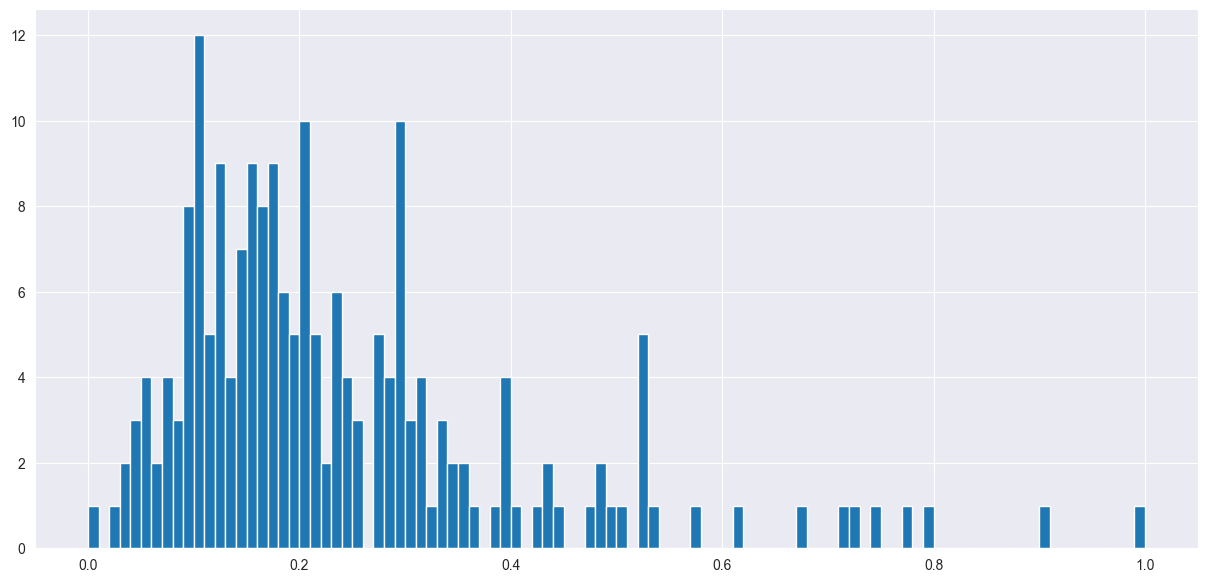

In [54]:
arff_file = arff.loadarff('./real/WPBC_withoutdupl_norm.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])

X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.9,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum()/ ((y != 1).sum())])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2)-np.min(arrtest2))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots))+2,tots)
print(skew(arr))
plt.hist(arr,bins=100)
plt.show()

In [55]:
arff_file = arff.loadarff('./real/Pima_withoutdupl_norm_35.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])

X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,60):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.9,.99,20) # or .3
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum()/ ((y != 1).sum())])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2))-np.min(arrtest2)
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(skew(arr)) # (5/2)
print(max(tots),tots.index(max(tots))+2,tots)

1.4034499801447424
0.6714285714285714 2 [0.6714285714285714, 0.6428571428571428, 0.5686274509803919, 0.47727272727272707, 0.509920634920635, 0.5296052631578947, 0.5555555555555556, 0.5604575163398693, 0.5148148148148147, 0.5451388888888888, 0.5994152046783624, 0.5833333333333333, 0.5554016620498614, 0.5350877192982455, 0.506578947368421, 0.4821428571428572, 0.5047619047619049, 0.5868347338935576, 0.5455882352941177, 0.5, 0.45789473684210513, 0.4663742690058479, 0.4542936288088641, 0.4289473684210525, 0.3915343915343914, 0.4285714285714285, 0.4185463659147869, 0.45614035087719296, 0.43421052631578944, 0.43540669856459324, 0.444078947368421, 0.45942982456140347, 0.45175438596491224, 0.45175438596491224, 0.45504385964912275, 0.45614035087719296, 0.4697916666666666, 0.47395833333333326, 0.48437499999999994, 0.4682017543859649, 0.4528508771929824, 0.4594298245614035, 0.456140350877193, 0.48124999999999996, 0.4689999999999999, 0.46499999999999997, 0.501984126984127, 0.4752380952380952, 0.479

![a](https://www.researchgate.net/publication/362262020/figure/fig1/AS:11431281159743859@1684461046122/Components-of-the-ex-Gaussian-function-The-calculated-ex-Gaussian-function-combines-the.png)